A) Training Samples - **8143**
   Test Samples -  **9752**

In [45]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [46]:
#Uploading the required Data
testdata = pd.read_csv('testData.txt', sep=',')
traindata = pd.read_csv('trainData.txt', sep=',')
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [47]:
# Choosing the required data from the Dataset
X = traindata.iloc[:5000, 1:6]
Y = testdata.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)


(3500, 5) (3500, 1) (1500, 5) (1500, 1)


In [48]:
#Building a Model by varing the number of hidden units and make a plot.
model = tf.keras.Sequential()
model.add(Dense(16, activation='relu',input_shape=(5, ))) 
model.add(Dense(32, activation='softplus'))
model.add(Dense(32, activation='softplus'))
model.add(Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 16)                96        
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [49]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [57]:
fitmodel = model.fit(train_x, train_y, epochs=10, validation_split=0.3)

Epoch 1/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8318 - val_loss: 0.4620 - val_accuracy: 0.8314
Epoch 2/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4280 - accuracy: 0.8343 - val_loss: 0.4070 - val_accuracy: 0.8362
Epoch 3/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3941 - accuracy: 0.8335 - val_loss: 0.3653 - val_accuracy: 0.8143
Epoch 4/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4101 - accuracy: 0.8371 - val_loss: 0.3858 - val_accuracy: 0.8457
Epoch 5/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.8363 - val_loss: 0.3714 - val_accuracy: 0.8371
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4221 - accuracy: 0.8208 - val_loss: 0.3775 - val_accuracy: 0.8476
Epoch 7/10
77/77 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.8265 - val_loss: 0.4734 - val_accuracy: 0.8210
Epoch 8/10
77/77 [==

In [58]:
training_loss, training_acc = model.evaluate(train_x, train_y)
testing_loss, testing_acc = model.evaluate(test_x, test_y)

47/47 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8747


In [59]:
pred = model.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

47/47 [==============================] - 0s 2ms/step
tf.Tensor(
[[1206    0]
 [ 294    0]], shape=(2, 2), dtype=int32)


Epoch 1/15
77/77 [==============================] - 0s 5ms/step - loss: 0.3991 - accuracy: 0.8388 - val_loss: 0.5071 - val_accuracy: 0.8124
Epoch 2/15
77/77 [==============================] - 0s 4ms/step - loss: 0.4099 - accuracy: 0.8433 - val_loss: 0.2936 - val_accuracy: 0.8752
Epoch 3/15
77/77 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.8429 - val_loss: 0.3400 - val_accuracy: 0.8667
Epoch 4/15
77/77 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.8457 - val_loss: 0.2939 - val_accuracy: 0.8800
Epoch 5/15
77/77 [==============================] - 0s 4ms/step - loss: 0.3258 - accuracy: 0.8584 - val_loss: 0.3006 - val_accuracy: 0.8638
Epoch 6/15
77/77 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.8531 - val_loss: 0.2857 - val_accuracy: 0.8876
Epoch 7/15
77/77 [==============================] - 0s 4ms/step - loss: 0.3940 - accuracy: 0.8294 - val_loss: 0.3636 - val_accuracy: 0.8476
Epoch 8/15
77/77 [==

Text(0, 0.5, 'Accuracy')

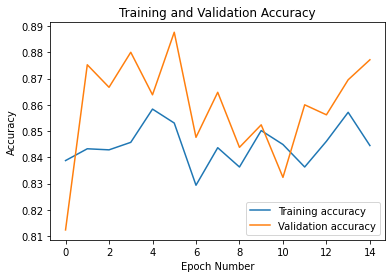

In [62]:
fitModel = model.fit(train_x, train_y, epochs = 15, validation_split = 0.3)
plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')


Text(0.5, 1.0, 'Training and Validation Loss')

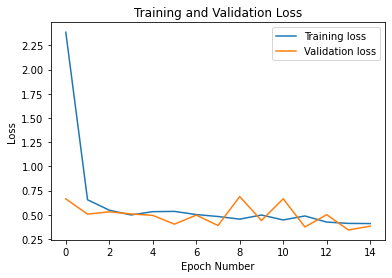

In [77]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.title('Training and Validation Loss')


In [78]:
test_predict = model.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)


47/47 [==============================] - 0s 2ms/step
confusion Matrix
 tf.Tensor(
[[1206    0]
 [ 294    0]], shape=(2, 2), dtype=int32)


c) The model is four layer with two hidden layers, this indicates that the model has **86% Accuracy**

In [87]:
model_1 = tf.keras.Sequential()
model_1.add(Dense(16, activation='relu',input_shape=(5, ))) 
model_1.add(Dense(32, activation='softplus'))
model_1.add(Dense(32, activation='softplus'))
model_1.add(Dense(32, activation='softplus'))
model_1.add(Dense(1, activation='sigmoid')) 

model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 16)                96        
                                                                 
 dense_36 (Dense)            (None, 32)                544       
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
_________________________________________________________________


In [88]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model_1.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])

In [89]:
fitmodel = model2.fit(train_x, train_y, epochs=10, validation_split=0.3)

Epoch 1/10
77/77 [==============================] - 0s 5ms/step - loss: 0.3243 - accuracy: 0.8604 - val_loss: 0.3049 - val_accuracy: 0.8762
Epoch 2/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3147 - accuracy: 0.8588 - val_loss: 0.3122 - val_accuracy: 0.8714
Epoch 3/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.8473 - val_loss: 0.2987 - val_accuracy: 0.8657
Epoch 4/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3222 - accuracy: 0.8555 - val_loss: 0.3392 - val_accuracy: 0.8600
Epoch 5/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.8551 - val_loss: 0.2913 - val_accuracy: 0.8333
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3252 - accuracy: 0.8486 - val_loss: 0.4796 - val_accuracy: 0.7181
Epoch 7/10
77/77 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.8433 - val_loss: 0.2901 - val_accuracy: 0.8590
Epoch 8/10
77/77 [==

In [90]:
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)

47/47 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.8853


In [91]:
pred = model2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

47/47 [==============================] - 0s 2ms/step
tf.Tensor(
[[1206    0]
 [ 294    0]], shape=(2, 2), dtype=int32)


Epoch 1/15
77/77 [==============================] - 2s 20ms/step - loss: 1.6369 - accuracy: 0.7139 - val_loss: 0.5816 - val_accuracy: 0.8248
Epoch 2/15
77/77 [==============================] - 1s 11ms/step - loss: 0.5366 - accuracy: 0.7878 - val_loss: 0.4728 - val_accuracy: 0.8210
Epoch 3/15
77/77 [==============================] - 1s 7ms/step - loss: 0.5613 - accuracy: 0.7865 - val_loss: 0.4240 - val_accuracy: 0.8314
Epoch 4/15
77/77 [==============================] - 0s 4ms/step - loss: 0.5220 - accuracy: 0.7894 - val_loss: 0.4343 - val_accuracy: 0.8343
Epoch 5/15
77/77 [==============================] - 0s 4ms/step - loss: 0.5034 - accuracy: 0.7984 - val_loss: 0.4781 - val_accuracy: 0.7610
Epoch 6/15
77/77 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.7947 - val_loss: 0.3892 - val_accuracy: 0.8305
Epoch 7/15
77/77 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.8045 - val_loss: 0.6208 - val_accuracy: 0.7438
Epoch 8/15
77/77 [

Text(0, 0.5, 'Accuracy')

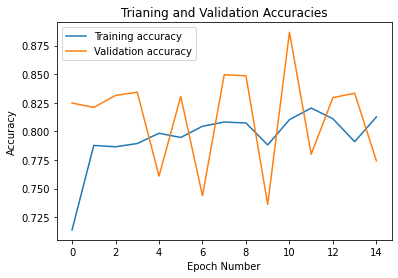

In [92]:
fitModel = model_1.fit(train_x, train_y, epochs = 15, validation_split = 0.3)
plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

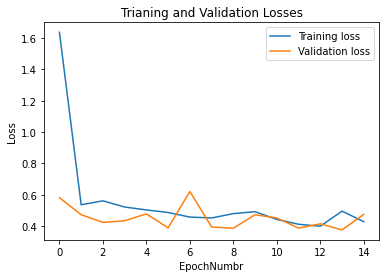

In [93]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('EpochNumbr')
plt.ylabel('Loss')